# Análise de tendência de séries temporais

**O que é uma tendência**: A tendência é movimento de crescimento ou de decrescimento da série temporal e que ocorrem de forma sustentada. A tendência pode ser global (estar em toda série) ou local (em uma parte da série).

## Teste *Mann-Kendall* em *R* e em *Python*


O Teste *Mann-Kendall* (*Mann*, 1945; *Kendall*, 1975) é utilizado para determinar se uma série de dados possui tendência temporal estatisticamente significativa, como, por exemplo, a análise de dados de monitoramento de águas superficiais ou subterrânea, visando determinar se concentrações de um contaminante químico apresentam tendência de diminuição, tendência de aumento ou ausência de tendência ao longo do tempo. Por isso, o Teste *Mann-Kendall* é um método muito utilizado em dados ambientais.

#### Hipóteses do teste

$H_0$ : Não há tendência presente nos dados.

$H_1$ : Há tendência nos dados.


Para saber se há tendência o *p-valor* do teste deve ser inferior ao nível de significância definido, para que a hipótese nula seja rejeitada. Para saber se a tendência é crescente ou decrescente, observa-se o sinal da estatística $S$.

## Habilitando a linguagem *R* no *Colab Notebook*

In [ ]:
%load_ext rpy2.ipython

## Instalando os pacotes do *R*

Em *R* existem dois pacotes que realizam o cálculo do teste *Mann-Kendall* que são o *trend* e o *kendall*.

Documentação dos pacotes:

1) [**Kendall**](https://cran.r-project.org/web/packages/Kendall/Kendall.pdf)

2) [**trend**](https://cran.r-project.org/web/packages/trend/trend.pdf)

In [ ]:
%%R

install.packages("trend")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘extraDistr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/extraDistr_1.9.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 147894 bytes (144 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [ ]:
%%R

install.packages("Kendall")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Kendall_2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10880 bytes (10 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

## Instalando a biblioteca do *Python*

Em *Python* há apenas a biblioteca *pymannkendall*, mas é uma biblioteca bastante extensa e com mais testes de tendência.

Documentação : [**pymannkendall**](https://github.com/mmhs013/pyMannKendall).

In [ ]:
pip install pymannkendall

## Importando os pacotes e a biblioteca

In [ ]:
%%R

library(trend)
library(Kendall)

In [ ]:
import pymannkendall as mk
import pandas as pd

## Importando a base de dados

Os dados foram extraídos do *Federal Reserve Bank* e podem ser extraídos [aqui](https://fred.stlouisfed.org/series/MRTSSM4453USS). A série trata de Vendas no varejo de lojas de cerveja, vinho e licores nos Estados Unidos.

In [ ]:
%%R
#em R
serie = read.csv('MRTSSM4453USS.csv')

In [ ]:
#em Python
serie = pd.read_csv('MRTSSM4453USS.csv')

Últimas observações.

In [ ]:
%%R

tail(serie)

          DATE MRTSSM4453USS
336 2019-12-01          5065
337 2020-01-01          5114
338 2020-02-01          5145
339 2020-03-01          6065
340 2020-04-01          5569
341 2020-05-01          6072


In [ ]:
serie.tail()

,DATE,MRTSSM4453USS
336,2020-01-01,5114
337,2020-02-01,5145
338,2020-03-01,6065
339,2020-04-01,5569
340,2020-05-01,6072


## Aplicando o teste de *Mann-Kendall*

Pacote *trend*

In [ ]:
%%R

mk.test(serie$MRTSSM4453USS)


	Mann-Kendall trend test

data:  serie$MRTSSM4453USS
z = 26.657, n = 341, p-value < 2.2e-16
alternative hypothesis: true S is not equal to 0
sample estimates:
           S         varS          tau 
5.607700e+04 4.425028e+06 9.674704e-01 



Pacote *MannKendall*

In [ ]:
%%R

MannKendall(serie$MRTSSM4453USS)

tau = 0.967, 2-sided pvalue =< 2.22e-16


Biblioteca *pymannkendall*

In [ ]:
#teste Mann-Kendall
resultado = mk.original_test(serie['MRTSSM4453USS'])

#Nome dos resultados
nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']

#
for i,j in zip(nomes,resultado):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 26.657474298711687
Tau Kendall : 0.9673451785406244
Pontuação Kendall : 56077.0
Variância S : 4425028.333333333
Declive : 9.854623154623155
Intercepto : 1296.7140637140635


## Interpretação do teste

Todos os teste, em sua estrutura padrão, apresentaram resultados com pouquíssimas diferenças. Como o *p-valor* ficou abaixo de 5% (nível de significância padrão), rejeitamos a hipótese nula de ausência de tendência nos dados.

Agora que temos a tendência, resta saber por meio do teste se ela é crescente ou decrescente. Isso é averiguado por meio da estatística $\tau$ gerada: se for positiva, a tendência é ascendente; se o sinal for negativo, a tendência será descendente. E como observado anteriormente, o valor foi $S = 56077$, logo a tendência da série é de aumento ao longo do tempo.

Plotando a série temporal em *R*.

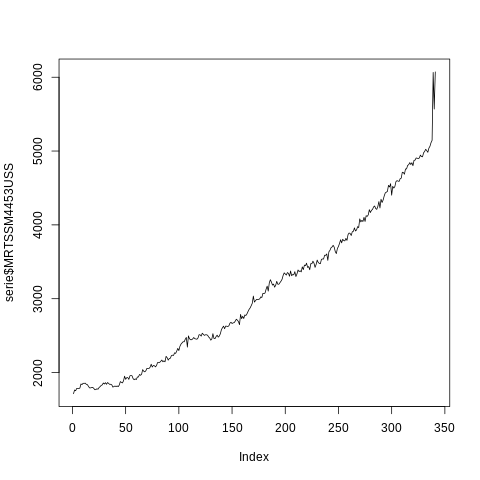

In [ ]:
%%R

plot(serie$MRTSSM4453USS,  type = "l")

Plotando a série temporal em *Python*.

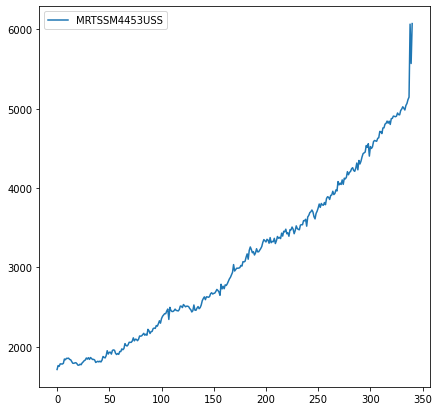

In [ ]:
serie.plot(figsize=(7,7));